<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Gauss_Seidel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##GAUSS SEIDEL

Importamos las librerias necesarias

In [10]:
import numpy as np
import pandas as pd

Definimos el problema con los parametros necesarios

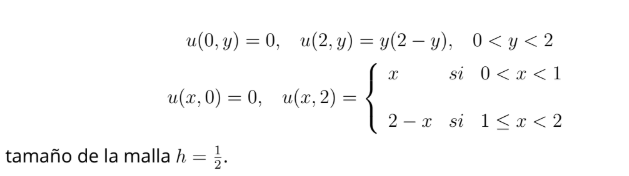

In [11]:
h = 0.5
n = 2
N = int(n/h) + 1
tol = 1e-6
max_iter = 50

Condiciones de frontera

In [12]:
def frontera(x, y):
    #Lado izquierdo
    if x == 0:
        return 0.0
    #Lado derecho
    if x == 2:
        return y*(2-y)

    if y == 0:
        return 0.0

    if y == 2:
        if 0 < x < 1:
            return x
        else:
            return 2-x
    return None


Construimos la malla

In [13]:
xs = np.linspace(0, 2, N)
ys = np.linspace(0, 2, N)

#Nodos interiores
interiores = []
for j in range(1, N-1):       # y
    for i in range(1, N-1):   # x
        interiores.append((i, j))


num_incognitas = len(interiores)



Implemetamos el metodo Gauss Seidel y calculamos el error

In [17]:
mapa = {pt: k for k, pt in enumerate(interiores)}

x = np.zeros(num_incognitas)
tabla = []

for it in range(1, max_iter+1):
    x_old = x.copy()
    for (i, j), k in mapa.items():

        suma = 0.0

        if (i-1, j) in mapa:
            suma += x[mapa[(i-1, j)]]
        else:
            suma += frontera(xs[i-1], ys[j])

        if (i+1, j) in mapa:
            suma += x[mapa[(i+1, j)]]
        else:
            suma += frontera(xs[i+1], ys[j])

        if (i, j-1) in mapa:
            suma += x[mapa[(i, j-1)]]
        else:
            suma += frontera(xs[i], ys[j-1])

        if (i, j+1) in mapa:
            suma += x[mapa[(i, j+1)]]
        else:
            suma += frontera(xs[i], ys[j+1])

        x[k] = 0.25 * suma

    #Error
    err = np.linalg.norm(x - x_old, ord=np.inf)
    fila = [it] + list(x) + [err]
    tabla.append(fila)
    if err < tol:
        break

Mostrando los resultados

In [18]:
cols = ["Iteración"] + [f"x{i+1}" for i in range(num_incognitas)] + ["Error"]
df = pd.DataFrame(tabla, columns=cols)
print("Método de Gauss-Seidel")
print(df.to_string(index=False))

Método de Gauss-Seidel
 Iteración       x1       x2       x3       x4       x5       x6       x7       x8       x9        Error
         1 0.000000 0.000000 0.187500 0.000000 0.000000 0.296875 0.125000 0.281250 0.457031 4.570312e-01
         2 0.000000 0.046875 0.273438 0.031250 0.164062 0.473633 0.203125 0.456055 0.544922 1.767578e-01
         3 0.019531 0.114258 0.334473 0.096680 0.285156 0.541138 0.263184 0.523315 0.578613 1.210938e-01
         4 0.052734 0.168091 0.364807 0.150269 0.345703 0.572281 0.293396 0.554428 0.594177 6.054688e-02
         5 0.079590 0.197525 0.379951 0.179672 0.375977 0.587526 0.308525 0.569670 0.601799 3.027344e-02
         6 0.094299 0.212557 0.387521 0.194700 0.391113 0.595108 0.316092 0.577251 0.605590 1.513672e-02
         7 0.101814 0.220112 0.391305 0.202255 0.398682 0.598894 0.319877 0.581037 0.607483 7.568359e-03
         8 0.105592 0.223895 0.393197 0.206037 0.402466 0.600786 0.321769 0.582929 0.608429 3.784180e-03
         9 0.107483 0.225787 0.3